In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling();

<h1>CIFAR-100</h1>

__CIFAR-100__ (_Canadian Institute for Advanced Research 100_) ist ein bekannter Datensatz für das Trainieren und Testen von Bildklassifikationsalgorithmen.

Der Datensatz wurde (wie __CIFAR-10__) von  _Alex Krizhevsky_, _Vinod Nair_ und _Geoffrey Hinton_ erstellt. Sie griffen dabei auf den wesentlich größeren Datensatz __80 Million Tiny Images__ zurück, der mittlerweile nicht mehr im Internet zur Verfügung steht.

Da CIFAR-100 zehnmal so viele Klassen hat wie CIFAR-10, ist die Klassifikation schwieriger. Viele Klassen sind optisch sehr ähnlich, was es zu einer Herausforderung für Deep-Learning-Modelle macht.

CIFAR-100 ist ein hervorragender Benchmark für Bildklassifikation und wird häufig in der Forschung genutzt, um neue neuronale Netzwerkarchitekturen zu testen. Besonders Convolutional Neural Networks (CNNs) werden oft auf diesem Datensatz trainiert.


### Hauptmerkmale des CIFAR-100 Datensatzes

* Anzahl der Bilder: 60.000
    * 50.000 Trainingsbilder
    * 10.000 Testbilder
* Bildgröße: 32×32 Pixel
* Farben: RGB (drei Farbkanäle)
* Anzahl der Klassen: 100 (jeweils 600 Bilder pro Klasse)
* Hierarchische Struktur:
    * 100 Fein-Klassen (fine labels)
    * 20 Oberklassen (coarse labels), die verwandte Kategorien gruppieren

### Die Klassen

Der Datensatz enthält 60.000 Farbbilder mit einer Größe von 32×32 Pixeln, die zu jeweils 600 Bildern in 100 Klassen unterteilt sind:

Die 100 feinen Klassen sind in 20 übergeordnete Gruppen aufgeteilt. Jede Oberklasse enthält mehrere verwandte feine Klassen.

__Beispiel für die hierarchische Struktur:__

* Oberklasse: „Fahrzeuge 1“
    * Fein-Klassen: Fahrrad, Bus, Motorrad, Zug
* Oberklasse: „Fahrzeuge 2“
    * Fein-Klassen: Auto, LKW
* Oberklasse: „Haustiere“
    * Fein-Klassen: Hund, Katze, Kaninchen, Schimpanse
* Oberklasse: „Wildtiere“
    * Fein-Klassen: Bär, Leopard, Löwe, Tiger, Wolf

Die vollständige Liste der 100 Klassen kann in der offiziellen CIFAR-Dokumentation gefunden werden.

### Einlesen (und ggf. einmaliger Download) des Datensatzes

Die Bibliothek `torchvision` stellt eine Methde zum Download des Datensatzes bereit. Die Daten werden als gzip-Datei heruntergladen und entpackt.

In [1]:
import torchvision
import torchvision.transforms as transforms

# Transformation der Bilder in Tensoren
transform = transforms.Compose([transforms.ToTensor()])

# CIFAR-100 Datensatz herunterladen
train_data = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

print(f"Anzahl der Trainingsbilder: {len(train_data)}, nzahl der Testbilder: {len(test_data)}")

Anzahl der Trainingsbilder: 50000, nzahl der Testbilder: 10000


### Beispielbilder

In den Strukturen `training_data` und `test_data` befinden sich nun die Bilddaten und die dazugehörenden Labels.

#### Bildformat in PyTorch

`PyTorch` erwartet (farbige) Bilddaten als dreidimensionalen `Tensor`: Die drei Farbinformationen sind als drei übereinanderliegende Ebenen angeordnet. Normalerweise bestehen Bilddaten aus einem zweidiemnsionalen Array mit jeweils drei Farbwerten (RGB). Um zwischen diesen beiden Formaten zu wechseln, kann man die Methode `permute` verwenden, mit den die Dimensionen eines `Tensors` "vertauscht" werden.

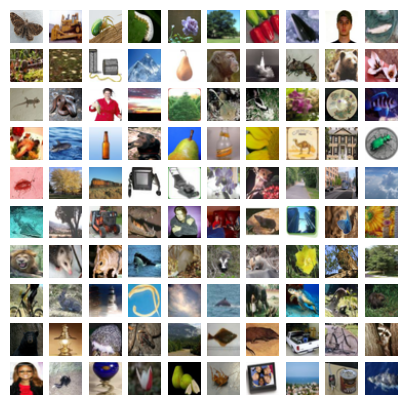

In [7]:
import matplotlib.pyplot as plt
from random import randint

rows, cols = 10,10

fig, axs = plt.subplots(rows, cols, figsize=(5,5))

for n, ax in enumerate(axs.flat):
    image, label = train_data[randint(0,len(train_data))]
    ax.imshow(image.permute(1,2,0))
    ax.axis('off')     

### Optional: Konvertierung der Daten in das YOLO-Format

 Danach befinden sich im Datenverzeichnis `cifar-100-python` fünf Batches mit je 10.000 Bildern zum Training (`data_batch_1` - `data_batch_5`) sowie eine weitere Datei zum Test (`text_batch`).



<div style="background-color: #ff3333; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>In Arbeit</strong></div>


In [4]:
import numpy as np
from PIL import Image
import os
from torch.utils.data import ConcatDataset

def convert_data():  
    image_dir = f'./data/cifar-100/images'
    label_dir = f'./data/cifar-100/labels'
    os.makedirs(image_dir, exist_ok=True)
    os.makedirs(label_dir, exist_ok=True)     
    combined_dataset = ConcatDataset([training_data, test_data])

    print(f'Konvertiere {len(combined_dataset)} Datensätze')
    for n, (data, label) in enumerate(combined_dataset):
        data = data.permute(0,1,2).numpy()        
        r, g, b = data[0], data[1],data[2]
        print(r.shape)
        rgb = np.stack([r, g, b], axis=-1)
        image = Image.fromarray(rgb, 'RGB')
        fname = f'{n+1:05}-{label}'
        image.save(f'{image_dir}/{fname}.png')

        with open(f'{label_dir}/{fname}.txt','w') as f:
            f.write(f"{label} 0.5 0.5 1.0 1.0\n")  

        break
    print(f'Konvertierung beendet')            

#convert_data()           